In [2]:
import pandas as pd
import requests
import numpy as np
import json
import tweepy

In [3]:
#create df for twitter archive
twit_arch = pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
#access img predictions
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url, stream=True)

In [5]:
#create tsv for img predictions
with open('image-predictions.tsv', 'wb') as f:
    for item in r:
        f.write(item)

In [6]:
#create df for img predictions
img_pred = pd.read_csv('image-predictions.tsv', sep='\t')

In [7]:
#keys for accessing API
consumer_key = 'Z3Oz1kXvqymKJSSImppIqoDR2'
consumer_secret = 'oQPgmHnM4CnbmfbHcZKliacP6x0gyKSDJ9kde6yGOHOyhQ6RD9'

access_token = '829641247962836993-kbbUiL3mCfOic2XHDp0fJ2OtIzVrDVJ'
access_token_secret = 'Td6gHrNB6FnUtjySKqmm59fSkOHL33ggVsQ41dQPvssEh'

In [8]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

In [9]:
api = tweepy.API(auth)

In [10]:
#access we rate dogs username, @dog_rates
we_rate_dogs = api.get_user('dog_rates')

In [11]:
#get all tweets and put them into a dict with retweet and like counts
retweets_likes = {}
for tw_id in twit_arch.tweet_id:
    try:
        tweet = api.get_status(tw_id)
        retweets_likes[tweet.id] = {
            'retweets' : tweet.retweet_count, 
            'likes' : tweet.favorite_count}
    except:
        retweets_likes[tw_id] = {
            'retweets' : 'None', 
            'likes' : 'None'}

In [12]:
#put dict of retweets_likes into json file
with open('tweet_json.txt', 'w') as outfile:  
    json.dump(retweets_likes, outfile)

In [13]:
#make dict into dataframe
retweets_likes = pd.DataFrame(retweets_likes)

In [14]:
#open file to make dict into dataframe
with open('tweet_json.txt', 'r') as infile:
    retweets_likes = pd.DataFrame(json.load(infile))

### To run on startup

Run when it's not necessary to recreate the files from above / to regather data. 

In [4]:
import pandas as pd
import requests
import numpy as np
import json
import tweepy

In [5]:
#create df for twitter archive
twit_arch = pd.read_csv('twitter-archive-enhanced.csv')

In [6]:
#create df for img predictions
img_pred = pd.read_csv('image-predictions.tsv', sep='\t')

In [7]:
with open('tweet_json.txt', 'r') as infile:
    retweets_likes = pd.DataFrame(json.load(infile))

### Data Assessment

In [8]:
#clean copies
retweets_likes_clean = retweets_likes.copy()
img_pred_clean = img_pred.copy()
twit_arch_clean = twit_arch.copy()

Visual Check of Data

In [9]:
twit_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
twit_arch_clean.head(25)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [11]:
twit_arch_clean.name.value_counts()

None         745
a             55
Charlie       12
Cooper        11
Lucy          11
Oliver        11
Penny         10
Lola          10
Tucker        10
Winston        9
Bo             9
the            8
Sadie          8
Daisy          7
Toby           7
Bailey         7
Buddy          7
an             7
Stanley        6
Koda           6
Scout          6
Jax            6
Dave           6
Leo            6
Bella          6
Jack           6
Milo           6
Rusty          6
Oscar          6
Gus            5
            ... 
Tove           1
Glacier        1
Pip            1
Zoe            1
Cilantro       1
Jennifur       1
Olaf           1
Teddy          1
Socks          1
Snoop          1
Lenox          1
Jeremy         1
Zooey          1
Todo           1
Kanu           1
Ember          1
Steve          1
Laika          1
Eazy           1
Obi            1
Kane           1
Finnegus       1
Alexander      1
Meatball       1
Zara           1
Bronte         1
Edgar          1
Glenn         

- not all dogs are categorized into doggo, floofer, pupper or puppo
- some dogs are missing names, eg 'None' or 'a' or 'an'
- should combine rating numerator over denominator for easier reading
- can remove retweeted data, since it's not original (if it's a retweet, remove it) and then can remove all columns related to that for cleaner looking dataset

In [12]:
img_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.0+ KB


In [13]:
img_pred_clean.head(25)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


- can combine this dataset with the other- if tweet id's match, can add guess if it's above a certain score

In [14]:
retweets_likes_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, likes to retweets
Columns: 2356 entries, 666020888022790149 to 892420643555336193
dtypes: int64(1788), object(568)
memory usage: 36.8+ KB


In [15]:
retweets_likes_clean.head()

,666020888022790149,666029285002620928,666033412701032449,666044226329800704,666049248165822465,666050758794694657,666051853826850816,666055525042405380,666057090499244032,666058600524156928,...,890240255349198849,890609185150312448,890729181411237888,890971913173991426,891087950875897856,891327558926688256,891689557279858688,891815181378084864,892177421306343426,892420643555336193
likes,None,None,None,None,None,None,None,None,None,None,...,32077,27894,65859,11908,20310,40488,42320,25150,33373,38984
retweets,None,None,None,None,None,None,None,None,None,None,...,7525,4322,19167,2104,3159,9523,8763,4215,6354,8646


- need to transpose dataset
- can combine this with other dataset

### Quality Issues

twit_arch

- X Change timestamp data type into datetime (from object) in twit_arch_clean
- X Erase useless columns (source)
- X delete dogs with no names (unlikely that there's a rating)
- X Remove tweets that are replies
- X Remove tweets that are retweets
- join rating numerator and denominator
- fix rating numerators - some are decimals

img_pred

- X only include column of id, link, and best guess
- X add to twit_arch

retweets_likes
- X Switch retweets and likes columns & rows (transpose)
- X add column header for tweet id
- X add columns to twit_arch, match by tweet id
- X put 0 instead of None for likes / retweets

all
- X make tweet_id into ints 

### Tidiness Issues:

twit_arch

X transpose retweets_likes dataframe
X Combine doggo, floofer, puppo and pupper into one column
- Combine ratings into one column and make into a string

### Tidiness Issues & Testing

Define: Retweets_likes dataframe is wide rather than long, fix using transpose

Code

In [16]:
#transpose retweets_likes so columns are retweets & likes, rows are tweet IDs
retweets_likes_clean = retweets_likes_clean.transpose()

Test

In [17]:
#test retweets_likes
retweets_likes_clean.sample(10)

,likes,retweets
840698636975636481,195,3
712097430750289920,4070,1147
707387676719185920,3765,1440
669749430875258880,None,None
674788554665512960,848,225
793150605191548928,6785,1939
669363888236994561,None,None
720043174954147842,None,None
671520732782923777,1453,570
815390420867969024,11293,4292


### Quality Issues & Testing

Define: Timestamp data in twitter archive should be in datetime format

Code

In [18]:
#Change timestamp data type into datetime (from object) in twit_arch_clean
twit_arch_clean.timestamp = pd.to_datetime(twit_arch_clean.timestamp)

Test

In [19]:
#testing for datetime
twit_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

Define: Get all numerator and denominator values from tweet text, create new ratings column

Code

In [20]:
#convert rating numerator and denominator to floats
twit_arch_clean.rating_numerator = twit_arch_clean.rating_numerator.astype(float)

In [21]:
df = twit_arch_clean.text.str.extract('(\d+(\.\d+)*\/\d+)')

/Users/Kellie/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


In [22]:
#double check up until value 45, which is a float
df.head(46)

,0,1
0,13/10,NaN
1,13/10,NaN
2,12/10,NaN
3,13/10,NaN
4,12/10,NaN
5,13/10,NaN
6,13/10,NaN
7,13/10,NaN
8,13/10,NaN
9,14/10,NaN


In [23]:
#create new column of ratings
twit_arch_clean['rating'] = df[0]

Test

In [24]:
#test that it works
twit_arch_clean.head(46)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None,None,None,None,13/10
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None,None,None,None,13/10
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,None,None,None,None,12/10
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,None,None,None,None,13/10
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,None,None,None,None,12/10
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13.0,10,None,None,None,None,None,13/10
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10,Jax,None,None,None,None,13/10
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13.0,10,None,None,None,None,None,13/10
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13.0,10,Zoey,None,None,None,None,13/10
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14.0,10,Cassie,doggo,None,None,None,14/10


Define: Fix index on retweets dataframe to match tweet_id on twit_arch_clean dataframe

Code

In [25]:
#reset retweets_likes_clean index
retweets_likes_clean = retweets_likes_clean.reset_index()

In [26]:
#rename column headers to match twit_arch_clean
retweets_likes_clean.columns = ['tweet_id', 'likes', 'retweets']

Test

In [27]:
retweets_likes_clean.sample(10)

,tweet_id,likes,retweets
1924,820837357901512704,0,7541
1221,728653952833728512,None,None
566,677547928504967168,7409,3984
916,696894894812565505,2530,743
1760,798701998996647937,0,8886
172,668989615043424256,None,None
812,689557536375177216,2213,509
120,668171859951755264,None,None
2091,842163532590374912,26163,6384
1437,756651752796094464,None,None


Define: Make all values in retweets into ints

Code

In [28]:
#make tweet_id, retweets, and likes into ints; replace None with 0
retweets_likes_clean = retweets_likes_clean.replace(to_replace='None', value=0)

Test

In [29]:
retweets_likes_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 3 columns):
tweet_id    2356 non-null object
likes       2356 non-null int64
retweets    2356 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


In [30]:
retweets_likes_clean.tweet_id = retweets_likes_clean.tweet_id.astype(int)

In [31]:
retweets_likes_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 3 columns):
tweet_id    2356 non-null int64
likes       2356 non-null int64
retweets    2356 non-null int64
dtypes: int64(3)
memory usage: 55.3 KB


Define: Combine twit_arch_clean with retweets_likes using tweet_id

Code

In [32]:
#Combine twit_arch with retweets_likes
twit_arch_clean = pd.merge(twit_arch_clean, retweets_likes_clean,
                            on=['tweet_id'], how='left')

Test

In [33]:
twit_arch_clean.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating,likes,retweets
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27.0,10,Sophie,None,None,pupper,None,11.27/10,7185,1836


In [34]:
twit_arch_clean.likes.value_counts()

0        727
1152       3
2382       3
2085       3
1170       3
1622       3
2647       3
1479       3
3493       3
13779      2
2502       2
3558       2
2543       2
8575       2
3319       2
4018       2
1560       2
1573       2
2479       2
1477       2
3634       2
2525       2
3688       2
3652       2
3699       2
1794       2
2315       2
2317       2
2323       2
2913       2
        ... 
751        1
2804       1
757        1
1476       1
13047      1
27384      1
2760       1
15042      1
23168      1
39612      1
12929      1
21123      1
6788       1
10886      1
12937      1
2698       1
21137      1
10898      1
2708       1
8855       1
10904      1
21157      1
2726       1
53927      1
2730       1
6335       1
4783       1
10928      1
611        1
20531      1
Name: likes, Length: 1528, dtype: int64

### Quality, Round 2

Define: Delete tweets that are replies are retweets

Code

In [35]:
#Check for tweets that are replies, and delete
twit_arch_clean.in_reply_to_status_id = twit_arch_clean.in_reply_to_status_id.notnull()

twit_arch_clean = twit_arch_clean[twit_arch_clean.in_reply_to_status_id != True]

In [36]:
#check (using user_id) that there are no values besides null listed
twit_arch_clean.in_reply_to_user_id.value_counts()

Series([], Name: in_reply_to_user_id, dtype: int64)

In [37]:
#drop both columns
twit_arch_clean = twit_arch_clean.drop('in_reply_to_user_id', axis=1)
twit_arch_clean = twit_arch_clean.drop('in_reply_to_status_id', axis=1)

Test

In [38]:
#make sure the columns are gone
twit_arch_clean.head()

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating,likes,retweets
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None,None,None,None,13/10,38984,8646
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None,None,None,None,13/10,33373,6354
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,None,None,None,None,12/10,25150,4215
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,None,None,None,None,13/10,42320,8763
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,None,None,None,None,12/10,40488,9523


Define: Delete tweets that are retweets

Code

In [39]:
#Check for tweets that are retweets, and delete
twit_arch_clean.retweeted_status_id = twit_arch_clean.retweeted_status_id.notnull()

twit_arch_clean = twit_arch_clean[twit_arch_clean.retweeted_status_id != True]

In [40]:
#check (using user_id) that there are no values besides null listed
twit_arch_clean.retweeted_status_user_id.value_counts()

Series([], Name: retweeted_status_user_id, dtype: int64)

In [41]:
#drop all retweet columns
twit_arch_clean = twit_arch_clean.drop('retweeted_status_id', axis=1)

twit_arch_clean = twit_arch_clean.drop('retweeted_status_user_id', axis=1)

twit_arch_clean = twit_arch_clean.drop('retweeted_status_timestamp', axis=1)

Test

In [42]:
#make sure the columns are gone
twit_arch_clean.sample()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating,likes,retweets
1391,700143752053182464,2016-02-18 02:24:13,"<a href=""http://twitter.com/download/iphone"" r...",When it's Janet from accounting's birthday but...,https://twitter.com/dog_rates/status/700143752...,10.0,10,None,None,None,pupper,None,10/10,8114,3046


Define: Erase 'source' column

Code

In [43]:
#Erase source column- it's not used for our purposes
twit_arch_clean= twit_arch_clean.drop('source', axis=1)

Test

In [44]:
#test to make sure it's done
twit_arch_clean.sample()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating,likes,retweets
990,748705597323898880,2016-07-01 02:31:39,#BarkWeek is getting rather heckin terrifying ...,https://twitter.com/dog_rates/status/748705597...,13.0,10,None,None,None,None,None,13/10,0,0


Define: Combine dog category columns using melt

Code

In [45]:
dogs = twit_arch_clean[['tweet_id','doggo', 'floofer', 'pupper', 'puppo']].copy()


In [46]:
dogs = dogs.replace(to_replace='None', value='')

In [47]:
dogs['dog_type'] = dogs[dogs.columns[1:]].apply(lambda x: ''.join(x.astype(str)), axis=1)

In [48]:
dogs = dogs.drop('doggo', axis=1)
dogs = dogs.drop('floofer', axis=1)
dogs = dogs.drop('pupper', axis=1)
dogs = dogs.drop('puppo', axis=1)

In [49]:
dogs.sample(5)

,tweet_id,dog_type
1427,697630435728322560,
725,782722598790725632,
990,748705597323898880,
482,815390420867969024,
2338,666104133288665088,


In [50]:
twit_arch_clean = pd.merge(twit_arch_clean, dogs,
                            on=['tweet_id'], how='left')

Test

In [51]:
twit_arch_clean.sample(10)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating,likes,retweets,dog_type
1803,671357843010908160,2015-11-30 15:59:17,Tfw she says hello from the other side. 9/10 h...,https://twitter.com/dog_rates/status/671357843...,9.0,10,None,None,None,None,None,9/10,417,155,
730,753398408988139520,2016-07-14 01:19:12,This is Scout. Her batteries are low. 12/10 pr...,https://twitter.com/dog_rates/status/753398408...,12.0,10,Scout,None,None,None,None,12/10,0,0,
590,777189768882946048,2016-09-17 16:57:35,This is Jeffrey. He's being held so he doesn't...,https://twitter.com/dog_rates/status/777189768...,12.0,10,Jeffrey,None,None,None,None,12/10,15665,4874,
943,724004602748780546,2016-04-23 22:38:43,This is Luther. He saw a ghost. Spooked af. 11...,https://twitter.com/dog_rates/status/724004602...,11.0,10,Luther,None,None,pupper,None,11/10,0,0,pupper
1168,700143752053182464,2016-02-18 02:24:13,When it's Janet from accounting's birthday but...,https://twitter.com/dog_rates/status/700143752...,10.0,10,None,None,None,pupper,None,10/10,8114,3046,pupper
196,846042936437604353,2017-03-26 16:55:29,Meet Jarvis. The snow pupsets him. Officially ...,https://twitter.com/dog_rates/status/846042936...,12.0,10,Jarvis,None,None,None,None,12/10,16999,3147,
1150,701981390485725185,2016-02-23 04:06:20,This is Fiji. She's a Powdered Stegafloof. Ver...,https://twitter.com/dog_rates/status/701981390...,12.0,10,Fiji,None,None,None,None,12/10,3696,1087,
277,831262627380748289,2017-02-13 22:03:49,This is Tucker. He's feeling h*ckin festive an...,https://twitter.com/dog_rates/status/831262627...,12.0,10,Tucker,None,None,None,None,12/10,12848,2293,
1932,668979806671884288,2015-11-24 02:29:49,This is Chaz. He's an X Games half pipe supers...,https://twitter.com/dog_rates/status/668979806...,12.0,10,Chaz,None,None,None,None,12/10,0,0,
472,795464331001561088,2016-11-07 03:14:10,Elder doggo does a splash. Both 13/10 incredib...,https://twitter.com/dog_rates/status/795464331...,13.0,10,None,doggo,None,None,None,13/10,54788,27073,doggo


Define: Drop extra columns (doggo, floofer, puppo, pupper), and add 'none' values where values are missing

Code

In [52]:
twit_arch_clean = twit_arch_clean.drop('doggo', axis=1)
twit_arch_clean = twit_arch_clean.drop('floofer', axis=1)
twit_arch_clean = twit_arch_clean.drop('pupper', axis=1)
twit_arch_clean = twit_arch_clean.drop('puppo', axis=1)

In [53]:
twit_arch_clean.dog_type = twit_arch_clean.dog_type.replace('', 'none')

Test

In [54]:
twit_arch_clean.sample(10)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,rating,likes,retweets,dog_type
348,819227688460238848,2017-01-11 17:01:16,This is Finn. He's wondering if you come here ...,https://twitter.com/dog_rates/status/819227688...,12.0,10,Finn,12/10,25192,7541,none
901,732375214819057664,2016-05-17 01:00:32,This is Kyle (pronounced 'Mitch'). He strives ...,https://twitter.com/dog_rates/status/732375214...,11.0,10,Kyle,11/10,0,0,doggo
138,859924526012018688,2017-05-04 00:15:58,Meet Milky. She has no idea what happened. Jus...,https://twitter.com/dog_rates/status/859924526...,12.0,10,Milky,12/10,20138,4316,none
667,762464539388485633,2016-08-08 01:44:46,This is Buddy. His father was a bear and his m...,https://twitter.com/dog_rates/status/762464539...,12.0,10,Buddy,12/10,11280,4718,none
565,780931614150983680,2016-09-28 00:46:20,I want to finally rate this iconic puppo who t...,https://twitter.com/dog_rates/status/780931614...,13.0,10,None,13/10,23711,8318,puppo
1617,675489971617296384,2015-12-12 01:38:53,RT until we find this dog. Clearly a cool dog ...,https://twitter.com/dog_rates/status/675489971...,10.0,10,None,10/10,1371,649,none
860,739623569819336705,2016-06-06 01:02:55,Here's a doggo that don't need no human. 12/10...,https://vine.co/v/iY9Fr1I31U6,12.0,10,None,12/10,0,0,doggo
872,737826014890496000,2016-06-01 02:00:04,This is Remy. He has some long ass ears (proba...,https://twitter.com/dog_rates/status/737826014...,10.0,10,Remy,10/10,0,0,none
218,841077006473256960,2017-03-13 00:02:39,This is Dawn. She's just checking pup on you. ...,https://twitter.com/dog_rates/status/841077006...,12.0,10,Dawn,12/10,24520,5838,none
276,831309418084069378,2017-02-14 01:09:44,This is Scooter and his son Montoya. Scooter ...,https://twitter.com/dog_rates/status/831309418...,12.0,10,Scooter,12/10,12633,2715,none


Define: remove dogs with no names, dogs with name 'a'

Code

In [55]:
#delete dogs with no names ('None' and 'a')
twit_arch_clean = twit_arch_clean[twit_arch_clean.name != 'None']
twit_arch_clean = twit_arch_clean[twit_arch_clean.name != 'a']

Test

In [56]:
twit_arch_clean.name.value_counts()

Charlie     11
Lucy        11
Cooper      10
Oliver      10
Penny        9
Tucker       9
Lola         8
Winston      8
Sadie        8
the          8
Daisy        7
Toby         7
Koda         6
an           6
Bailey       6
Stanley      6
Jax          6
Oscar        6
Bo           6
Bella        6
Scout        5
Rusty        5
Milo         5
Louis        5
Leo          5
Chester      5
Dave         5
Bentley      5
Buddy        5
Boomer       4
            ..
Godzilla     1
Pavlov       1
Suki         1
Creg         1
Meatball     1
Finnegus     1
Stephan      1
Moreton      1
Clyde        1
Livvie       1
Brudge       1
Lili         1
Grizzie      1
Mollie       1
Teddy        1
Snoop        1
Lenox        1
Jeremy       1
Philbert     1
Zooey        1
Todo         1
Kanu         1
Dawn         1
Balto        1
Steve        1
Laika        1
Socks        1
Eazy         1
Kane         1
Opie         1
Name: name, Length: 953, dtype: int64

Define: remove all extra columns in img_predictions

Code

In [57]:
#delete extra columns in img_pred
img_pred_clean = img_pred_clean.drop('p2', axis=1)
img_pred_clean = img_pred_clean.drop('p2_conf', axis=1)
img_pred_clean = img_pred_clean.drop('p2_dog', axis=1)
img_pred_clean = img_pred_clean.drop('p3', axis=1)
img_pred_clean = img_pred_clean.drop('p3_conf', axis=1)
img_pred_clean = img_pred_clean.drop('p3_dog', axis=1)

In [58]:
img_pred_clean = img_pred_clean.drop('img_num', axis=1)

Test

In [59]:
img_pred_clean.sample()

,tweet_id,jpg_url,p1,p1_conf,p1_dog
1840,837820167694528512,https://pbs.twimg.com/media/C6CI_jbVAAA3-a1.jpg,golden_retriever,0.887625,True


Define: Combine Twitter archive with image predictions

Code

In [60]:
#Combine twit_arch with img_pred
twit_arch_clean = pd.merge(twit_arch_clean, img_pred_clean,
                            on=['tweet_id'], how='left')

Test

In [61]:
twit_arch_clean.sample()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,rating,likes,retweets,dog_type,jpg_url,p1,p1_conf,p1_dog
1059,681302363064414209,2015-12-28 02:35:15,This is Chuck. He's a neat dog. Very flexible....,https://twitter.com/dog_rates/status/681302363...,3.0,10,Chuck,3/10,4256,2027,none,https://pbs.twimg.com/media/CXR44l9WcAAcG_N.jpg,frilled_lizard,0.326259,False


Define: Remove numerator and denominator columns

Code

In [62]:
twit_arch_clean = twit_arch_clean.drop('rating_denominator', axis=1)
twit_arch_clean = twit_arch_clean.drop('rating_numerator', axis=1)

Test

In [63]:
twit_arch_clean.sample(10)

,tweet_id,timestamp,text,expanded_urls,name,rating,likes,retweets,dog_type,jpg_url,p1,p1_conf,p1_dog
781,711008018775851008,2016-03-19 01:54:56,This is Chuckles. He had a balloon but he acci...,https://twitter.com/dog_rates/status/711008018...,Chuckles,11/10,3208,689,pupper,https://pbs.twimg.com/media/Cd4CBQFW8AAY3ND.jpg,French_bulldog,0.731405,True
1114,678255464182861824,2015-12-19 16:47:58,This is Jessifer. She is a Bismoth Teriyaki. F...,https://twitter.com/dog_rates/status/678255464...,Jessifer,9/10,1695,408,none,https://pbs.twimg.com/media/CWmlvxJU4AEAqaN.jpg,Chihuahua,0.613819,True
955,690597161306841088,2016-01-22 18:09:28,This is Lolo. She's America af. Behind in scie...,https://twitter.com/dog_rates/status/690597161...,Lolo,11/10,2109,666,none,https://pbs.twimg.com/media/CZV-c9NVIAEWtiU.jpg,Lhasa,0.097500,True
375,793286476301799424,2016-11-01 03:00:09,This is Moreton. He's the Good Boy Who Lived. ...,https://twitter.com/dog_rates/status/793286476...,Moreton,13/10,27093,10442,none,https://pbs.twimg.com/media/CwJR1okWIAA6XMp.jpg,Afghan_hound,0.274637,True
417,786233965241827333,2016-10-12 15:55:59,This is Mattie. She's extremely dangerous. Wil...,https://twitter.com/dog_rates/status/786233965...,Mattie,11/10,16850,5431,none,https://pbs.twimg.com/media/CulDnZpWcAAGbZ-.jpg,Labrador_retriever,0.478193,True
418,785927819176054784,2016-10-11 19:39:28,This is Lucy. She's strives to be the best pot...,https://twitter.com/dog_rates/status/785927819...,Lucy,12/10,12489,3575,none,https://pbs.twimg.com/media/CugtKeXWEAAamDZ.jpg,teddy,0.972070,False
1333,669680153564442624,2015-11-26 00:52:45,This is Shawwn. He's a Turkish Gangrene Robitu...,https://twitter.com/dog_rates/status/669680153...,Shawwn,8/10,0,0,none,https://pbs.twimg.com/media/CUsuijgXAAE4pdi.jpg,dalmatian,0.141257,True
837,705898680587526145,2016-03-04 23:32:15,Meet Max. He's a Fallopian Cephalopuff. Eyes a...,https://twitter.com/dog_rates/status/705898680...,Max,10/10,2543,626,none,https://pbs.twimg.com/media/CcvbGj5W8AARjB6.jpg,collie,0.808276,True
1422,667012601033924608,2015-11-18 16:12:51,This is Klevin. He laughs a lot. Very cool dog...,https://twitter.com/dog_rates/status/667012601...,Klevin,9/10,0,0,none,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,hyena,0.987230,False
1051,681981167097122816,2015-12-29 23:32:35,This is Jimothy. He's a Trinidad Poliwhirl. Fa...,https://twitter.com/dog_rates/status/681981167...,Jimothy,12/10,2972,1135,none,https://pbs.twimg.com/media/CXbiQHmWcAAt6Lm.jpg,Labrador_retriever,0.452577,True


Define: Set dog_type as category

In [64]:
twit_arch_clean.dog_type = twit_arch_clean.dog_type.astype('category')

Define: drop all duplicates. 

Code

In [65]:
twit_arch_clean = twit_arch_clean.drop_duplicates(subset='tweet_id', keep='first')

Test

In [66]:
#test...
twit_arch_clean.sort_values(by='tweet_id', ascending=False)

,tweet_id,timestamp,text,expanded_urls,name,rating,likes,retweets,dog_type,jpg_url,p1,p1_conf,p1_dog
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,13/10,38984,8646,none,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,13/10,33373,6354,none,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,12/10,25150,4215,none,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,13/10,42320,8763,none,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,12/10,40488,9523,none,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True
5,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",Jax,13/10,11908,2104,none,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,Appenzeller,0.341703,True
6,890609185150312448,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,Zoey,13/10,27894,4322,none,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,Irish_terrier,0.487574,True
7,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,Cassie,14/10,32077,7525,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,0.511319,True
8,890006608113172480,2017-07-26 00:31:25,This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,Koda,13/10,30786,7438,none,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,Samoyed,0.957979,True
9,889880896479866881,2017-07-25 16:11:53,This is Bruno. He is a service shark. Only get...,https://twitter.com/dog_rates/status/889880896...,Bruno,13/10,27916,5033,none,https://pbs.twimg.com/media/DFl99B1WsAITKsg.jpg,French_bulldog,0.377417,True


### Store Cleaned Data in CSV

In [67]:
twit_arch_clean.to_csv('cleaned_tweet_data.csv')

### Analyze

In [68]:
#look at top favorited tweets
twit_arch_clean.sort_values(by='likes', ascending=False)

,tweet_id,timestamp,text,expanded_urls,name,rating,likes,retweets,dog_type,jpg_url,p1,p1_conf,p1_dog
87,866450705531457537,2017-05-22 00:28:40,This is Jamesy. He gives a kiss to every other...,https://twitter.com/dog_rates/status/866450705...,Jamesy,13/10,124705,36698,pupper,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,French_bulldog,0.905334,True
324,807106840509214720,2016-12-09 06:17:20,This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,Stephan,13/10,123490,61489,none,https://pbs.twimg.com/ext_tw_video_thumb/80710...,Chihuahua,0.505370,True
47,879415818425184262,2017-06-26 19:07:24,This is Duddles. He did an attempt. 13/10 some...,https://twitter.com/dog_rates/status/879415818...,Duddles,13/10,106393,44845,none,https://pbs.twimg.com/ext_tw_video_thumb/87941...,English_springer,0.383404,True
268,819004803107983360,2017-01-11 02:15:36,This is Bo. He was a very good First Doggo. 14...,https://twitter.com/dog_rates/status/819004803...,Bo,14/10,94056,41228,doggo,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,standard_poodle,0.351308,True
108,859196978902773760,2017-05-02 00:04:57,We only rate dogs. This is quite clearly a smo...,https://twitter.com/dog_rates/status/859196978...,quite,12/10,92898,31995,none,https://pbs.twimg.com/ext_tw_video_thumb/85919...,Angora,0.224218,False
75,870374049280663552,2017-06-01 20:18:38,This is Zoey. She really likes the planet. Wou...,https://twitter.com/dog_rates/status/870374049...,Zoey,13/10,83727,27022,none,https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg,golden_retriever,0.841001,True
54,877736472329191424,2017-06-22 03:54:17,This is Aja. She was just told she's a good do...,https://twitter.com/dog_rates/status/877736472...,Aja,13/10,80347,19507,none,https://pbs.twimg.com/media/DC5YqoQW0AArOLH.jpg,Chesapeake_Bay_retriever,0.837956,True
1139,676219687039057920,2015-12-14 01:58:31,This is Kenneth. He's stuck in a bubble. 10/10...,https://twitter.com/dog_rates/status/676219687...,Kenneth,10/10,79087,33859,none,https://pbs.twimg.com/media/CWJqN9iWwAAg86R.jpg,bubble,0.997556,False
27,884925521741709313,2017-07-12 00:01:00,This is Earl. He found a hat. Nervous about wh...,https://twitter.com/dog_rates/status/884925521...,Earl,12/10,77861,18753,none,https://pbs.twimg.com/media/DEfjEaNXkAAtPlj.jpg,Italian_greyhound,0.259916,True
213,830583320585068544,2017-02-12 01:04:29,This is Lilly. She just parallel barked. Kindl...,https://twitter.com/dog_rates/status/830583320...,Lilly,13/10,72270,18823,none,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,Labrador_retriever,0.908703,True


In [71]:
print(twit_arch_clean.text[87])
print(twit_arch_clean.text[324])
print(twit_arch_clean.text[47])
print(twit_arch_clean.text[268])
print(twit_arch_clean.text[108])

This is Jamesy. He gives a kiss to every other pupper he sees on his walk. 13/10 such passion, much tender https://t.co/wk7TfysWHr
This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d
This is Duddles. He did an attempt. 13/10 someone help him (vid by Georgia Felici) https://t.co/UDT7ZkcTgY
This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet https://t.co/AdPKrI8BZ1
We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9


In [663]:
#look at top retweeted tweets
twit_arch_clean.sort_values(by='retweets', ascending=False)

,tweet_id,timestamp,text,expanded_urls,name,rating,likes,retweets,dog_type,jpg_url,p1,p1_conf,p1_dog
324,807106840509214720,2016-12-09 06:17:20,This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,Stephan,13/10,123490,61489,none,https://pbs.twimg.com/ext_tw_video_thumb/80710...,Chihuahua,0.505370,True
47,879415818425184262,2017-06-26 19:07:24,This is Duddles. He did an attempt. 13/10 some...,https://twitter.com/dog_rates/status/879415818...,Duddles,13/10,106393,44845,none,https://pbs.twimg.com/ext_tw_video_thumb/87941...,English_springer,0.383404,True
268,819004803107983360,2017-01-11 02:15:36,This is Bo. He was a very good First Doggo. 14...,https://twitter.com/dog_rates/status/819004803...,Bo,14/10,94056,41228,doggo,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,standard_poodle,0.351308,True
87,866450705531457537,2017-05-22 00:28:40,This is Jamesy. He gives a kiss to every other...,https://twitter.com/dog_rates/status/866450705...,Jamesy,13/10,124705,36698,pupper,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,French_bulldog,0.905334,True
1139,676219687039057920,2015-12-14 01:58:31,This is Kenneth. He's stuck in a bubble. 10/10...,https://twitter.com/dog_rates/status/676219687...,Kenneth,10/10,79087,33859,none,https://pbs.twimg.com/media/CWJqN9iWwAAg86R.jpg,bubble,0.997556,False
108,859196978902773760,2017-05-02 00:04:57,We only rate dogs. This is quite clearly a smo...,https://twitter.com/dog_rates/status/859196978...,quite,12/10,92898,31995,none,https://pbs.twimg.com/ext_tw_video_thumb/85919...,Angora,0.224218,False
274,817827839487737858,2017-01-07 20:18:46,This is Buddy. He ran into a glass door once. ...,https://twitter.com/dog_rates/status/817827839...,Buddy,13/10,56660,30574,none,https://pbs.twimg.com/ext_tw_video_thumb/81782...,cocker_spaniel,0.387608,True
75,870374049280663552,2017-06-01 20:18:38,This is Zoey. She really likes the planet. Wou...,https://twitter.com/dog_rates/status/870374049...,Zoey,13/10,83727,27022,none,https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg,golden_retriever,0.841001,True
321,808344865868283904,2016-12-12 16:16:49,This is Seamus. He's very bad at entering pool...,https://vine.co/v/5QWd3LZqXxd,Seamus,11/10,46546,23480,none,NaN,NaN,NaN,NaN
267,819006400881917954,2017-01-11 02:21:57,This is Sunny. She was also a very good First ...,https://twitter.com/dog_rates/status/819006400...,Sunny,14/10,49176,21286,doggo,https://pbs.twimg.com/media/C12x-JTVIAAzdfl.jpg,prison,0.907083,False


In [664]:
#look at most frequently occurring rating
twit_arch_clean.rating.value_counts()

12/10       351
11/10       319
10/10       288
13/10       189
9/10        106
8/10         74
7/10         32
14/10        20
6/10         18
5/10         13
3/10         10
4/10          5
2/10          5
9.75/10       1
50/50         1
204/170       1
1/2           1
1776/10       1
13.5/10       1
24/7          1
7/11          1
11.27/10      1
Name: rating, dtype: int64

In [665]:
#top dog breeds predicted
twit_arch_clean.p1.value_counts()

golden_retriever                  95
Labrador_retriever                66
Pembroke                          65
Chihuahua                         59
pug                               41
chow                              32
toy_poodle                        28
Pomeranian                        26
Samoyed                           23
malamute                          22
French_bulldog                    22
cocker_spaniel                    19
Siberian_husky                    19
Chesapeake_Bay_retriever          17
miniature_pinscher                16
Staffordshire_bullterrier         16
Shih-Tzu                          15
German_shepherd                   15
seat_belt                         15
Shetland_sheepdog                 15
Cardigan                          14
beagle                            13
Eskimo_dog                        12
Old_English_sheepdog              11
Italian_greyhound                 11
Pekinese                          11
collie                            10
v

In [666]:
plot_goldens = twit_arch_clean.loc[twit_arch_clean['p1'] == 'golden_retriever']

In [667]:
import matplotlib.pyplot as plt
import numpy as np

In [668]:
x = plot_goldens.rating
y = plot_goldens.likes

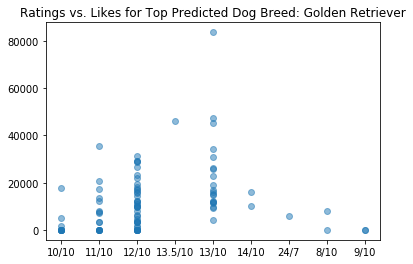

In [669]:
plt.scatter(x,y, alpha=0.5)
plt.title('Ratings vs. Likes for Top Predicted Dog Breed: Golden Retriever')
plt.figure(figsize=(1,1))
plt.show()

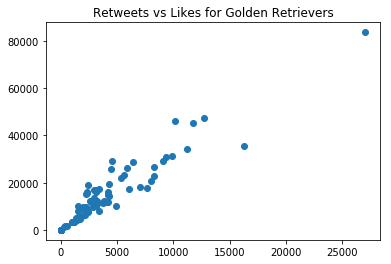

In [670]:
plt.scatter(plot_goldens.retweets, plot_goldens.likes)
plt.title('Retweets vs Likes for Golden Retrievers')
plt.figure(figsize=(100,50))
plt.show()

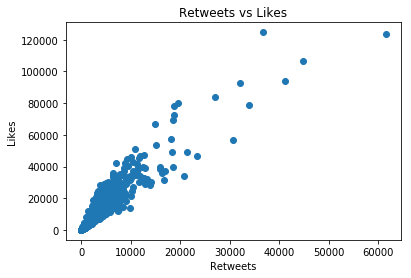

In [671]:
plt.scatter(twit_arch_clean.retweets, twit_arch_clean.likes)
plt.title('Retweets vs Likes')
plt.xlabel('Retweets')
plt.ylabel('Likes')
plt.figure(figsize=(100,50))
plt.show()

In [672]:
import seaborn as sns

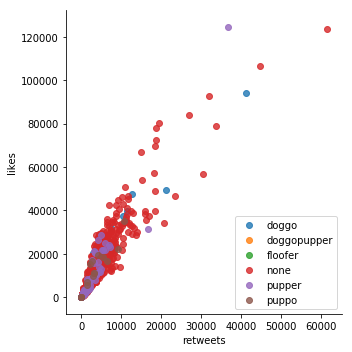

In [673]:
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x='retweets', y='likes', data=twit_arch_clean, fit_reg=False, hue='dog_type', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
 
#sns.plt.show()
